## Projeto Computação Quântica 2019.2
Centro de Informática - UFPE

Aluna: Débora Fortunato Dias (dfd2), Jerônimo

### Algoritmo de Grover e Otimizações

 


#### Roteiro

- Algoritmo de Grover
- Simulação I
- Otimizações
- Simulação II
- Conclusão
- Referências

### Algoritmo de Grover

Dado um espaço de N elementos, com M sendo o conjunto de soluções buscadas. Achar as soluções em $\sqrt{\frac{N}{M}}$ iterações.

- Inicialização

Todos qbits são iniciados em superposição, seus estados têm amplitude $\sqrt{N}$.

- Oráculo

O oráculo $O$ marca o estado $x_{0}$ que satisfaz a condição $f(x_{0}) = 1$ através de uma mudança de fase. Todos os outros estados permanecem inalterados. A operação tem o efeito de inverter a amplitude do estado marcado.

- Amplificação

Essa fase realiza a amplificação de amplitudes pela inversão sobre a média. Como a amplitude do estado alvo foi invertida enquanto os outros estados mantiveram suas amplitudes originais (fase anterior), essa mudança faz com que a amplitude do estado alvo aumente enquanto os outros diminuem.

- Medição

Os qbits são colapsados em um valor clássico.


##### Inicialização

In [285]:
N = 3

q = QuantumRegister(4,"q") #3 registradores e 1 ancilla
c = ClassicalRegister(3,"c")

circuit = QuantumCircuit(q,c)

circuit.h(q[0:3]) #hadamard

##### Oráculo

A ação do oráculo marca essencialmente a solução. Então, precisamos de algo que execute a operação abaixo.

- x é o índice do registrador
- O é um operador unitário
- f(x) é uma função de x que inverte q caso ele seja solução
- $\oplus$ é a soma módulo 2

O oráculo pode ser representado por:

 $$ \left| x \right\rangle \left| q \right\rangle \xrightarrow{O} \left| x \right\rangle \left| q \oplus f(x) \right\rangle $$
 

 Ou ainda mais simplificadamente:
 
 $$ \left| x \right\rangle \xrightarrow{O} (-1)^{f(x)} \left| x \right\rangle $$

In [282]:
    circuit.x(q[0])
    circuit.x(q[1])
    
    circuit.ccx(q[0], q[1], q[3]) #marca 000 e 001
    
    circuit.x(q[0])
    circuit.x(q[1])

##### Amplificação (Inversão sobre a média)

Um passo importante do algoritmo é ampliar a probabilidade de observação. Esta etapa executa essencialmente estas operações principais:

- Aplicar H a todos os qbits
- Aplicar uma mudança de fase condicional
- Aplique H a todos os qbits novamente

In [287]:
    circuit.h(q[0:3])
    circuit.x(q[0:3])
    circuit.mct(q[0:3], q[3], None, mode='advanced') 
    circuit.x(q[0:3])
    circuit.h(q[0:3])

### Implementação

In [286]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import math as m
from qiskit.visualization import plot_histogram

def Oraculo(circuit, q):
    circuit.x(q[0])
    circuit.x(q[1])
    
    #circuit.mct(q[0:3], q[3], None, mode='advanced') #usar para uma solucao
    circuit.ccx(q[0], q[1], q[3]) #usar para duas solucoes
    
    circuit.x(q[0])
    circuit.x(q[1])
    
    
def InversaoSobreMedia(circuit, q):
    circuit.h(q[0:3])
    circuit.x(q[0:3])
    circuit.mct(q[0:3], q[3], None, mode='advanced') 
    circuit.x(q[0:3])
    circuit.h(q[0:3])

q = QuantumRegister(4,"q")
c = ClassicalRegister(3,"c")

circuit = QuantumCircuit(q,c)

circuit.h(q[0:3])
circuit.x(q[3])
circuit.h(q[3])

circuit.barrier(q)

N = 8
M = 2

iteracoes = m.floor(m.pi *(N/M)**(1/2) / 4 ) 
for i in range(iteracoes):#
    Oraculo(circuit, q)
    circuit.barrier(q)
    InversaoSobreMedia(circuit,q)
    circuit.barrier(q)
    
    
#circuit.barrier(q)


### Simulação I

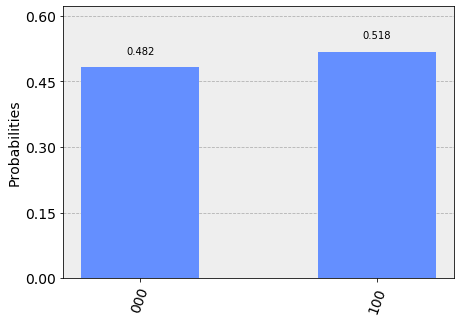

In [277]:
circuit.measure(q[0:3], c[0:3])
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator)
result = job.result()
counts = result.get_counts(circuit)


plot_histogram(counts)

In [197]:

#circuit.draw(output='mpl') 

### Otimizações


### Simulação II

### Conclusão

### Referências

Tight bounds on quantum searching
https://arxiv.org/abs/quant-ph/9605034

A quantum algorithm for finding the minimum
https://arxiv.org/pdf/quant-ph/9607014.pdf

Quantum Mechanics helps in searching for a needle in a haystack
https://arxiv.org/pdf/quant-ph/9706033.pdf